In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_keys
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in lat_lngs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [9]:
#Create base_url

url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_keys


In [5]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()

        # # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | klaksvik
Processing Record 2 of Set 1 | rigaud
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | ostrovnoy
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | tual
Processing Record 7 of Set 1 | flinders
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | upernavik
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | san quintin
Processing Record 12 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 13 of Set 1 | nimaparha
Processing Record 14 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 15 of Set 1 | tila
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | kashi
Processing Record 20 of Set 1 | anshan
Processing Record 21 of Set 1 | hilo
Processing Record 22 of Set 1 | cape town
Pro

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Klaksvik,62.2266,-6.5890,47.32,85,39,11.81,FO,2022-07-25 23:41:38
1,Rigaud,45.4793,-74.3024,75.18,73,0,12.33,CA,2022-07-25 23:41:04
2,Jamestown,42.0970,-79.2353,71.19,59,0,11.50,US,2022-07-25 23:39:45
3,Ostrovnoy,68.0531,39.5131,51.40,82,43,8.95,RU,2022-07-25 23:41:38
4,Kapaa,22.0752,-159.3190,84.18,63,100,16.11,US,2022-07-25 23:41:39
5,Tual,-5.6667,132.7500,79.72,83,42,20.69,ID,2022-07-25 23:41:39
6,Flinders,-34.5833,150.8552,61.05,89,84,5.01,AU,2022-07-25 23:41:40
7,Carnarvon,-24.8667,113.6333,61.25,40,0,8.52,AU,2022-07-25 23:41:40
8,Upernavik,72.7868,-56.1549,39.67,88,46,10.20,GL,2022-07-25 23:36:55
9,Bredasdorp,-34.5322,20.0403,46.90,67,0,4.56,ZA,2022-07-25 23:41:41


In [7]:
# Reorder the dataframe

city_data_sorted = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]]
city_data_sorted

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Klaksvik,FO,2022-07-25 23:41:38,62.2266,-6.5890,47.32,85,39,11.81
1,Rigaud,CA,2022-07-25 23:41:04,45.4793,-74.3024,75.18,73,0,12.33
2,Jamestown,US,2022-07-25 23:39:45,42.0970,-79.2353,71.19,59,0,11.50
3,Ostrovnoy,RU,2022-07-25 23:41:38,68.0531,39.5131,51.40,82,43,8.95
4,Kapaa,US,2022-07-25 23:41:39,22.0752,-159.3190,84.18,63,100,16.11
...,...,...,...,...,...,...,...,...,...
556,Gimli,CA,2022-07-25 23:56:29,50.6336,-96.9907,71.46,72,76,6.20
557,Nekhayevskiy,RU,2022-07-25 23:56:29,50.4106,41.7561,61.45,95,66,5.66
558,Jardim,BR,2022-07-25 23:56:29,-21.4803,-56.1381,74.25,37,3,2.93
559,Bilibino,RU,2022-07-25 23:57:30,68.0546,166.4372,53.47,44,44,8.86


In [53]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_sorted.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

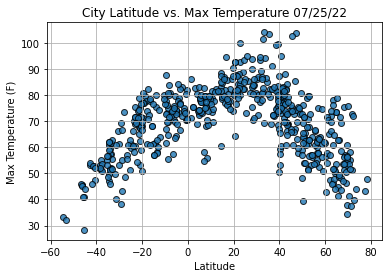

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

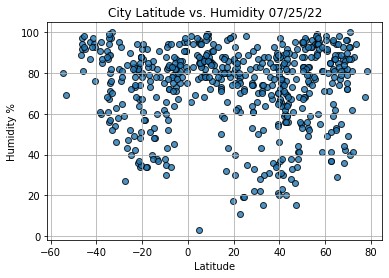

In [12]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

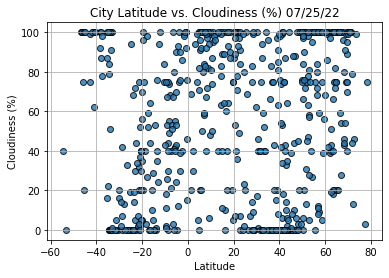

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

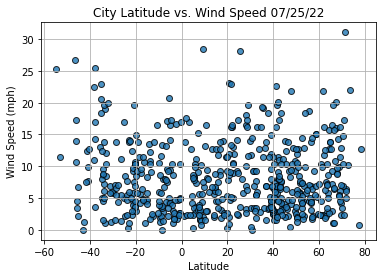

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [15]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_sorted.loc[13]
index13

City                    Hithadhoo
Country                        MV
Date          2022-07-25 23:41:43
Lat                          -0.6
Lng                       73.0833
Max Temp                     81.9
Humidity                       75
Cloudiness                     15
Wind Speed                  10.42
Name: 13, dtype: object

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

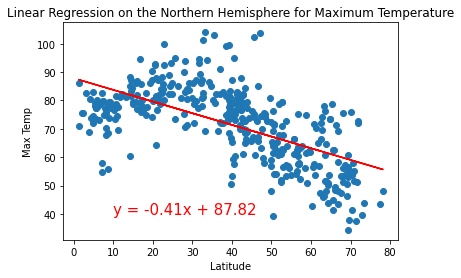

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

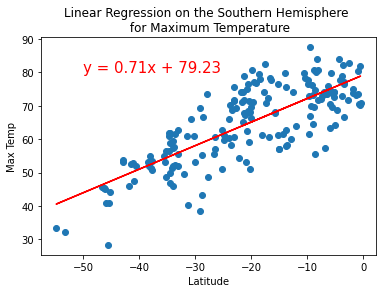

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,80))

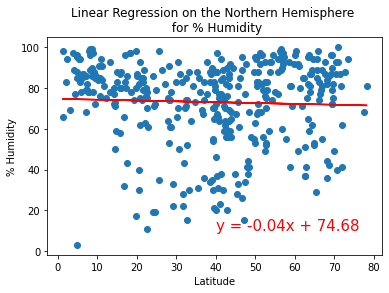

In [32]:
# Linear regression on the Northern Hemisphere for Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

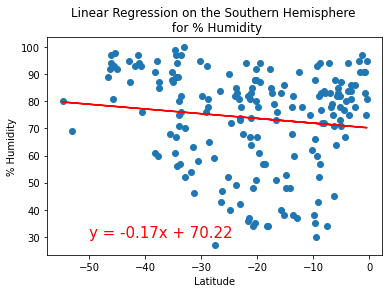

In [41]:
# Linear regression on the Southern Hemisphere for Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,30))

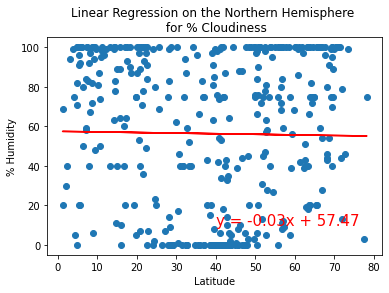

In [48]:
# Linear regression on the Northern Hemisphere for cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

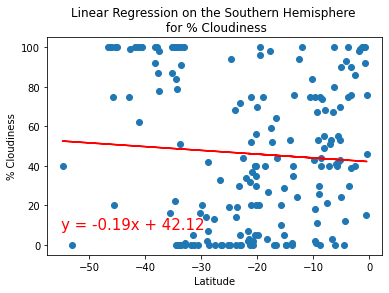

In [50]:
# Linear regression on the Southern Hemisphere for cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55,8))

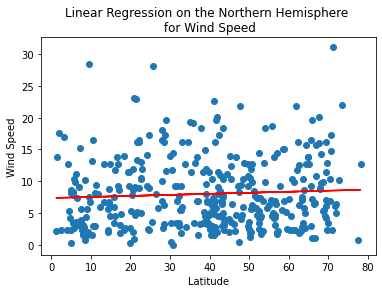

In [51]:
# Linear regression on the Northern Hemisphere Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

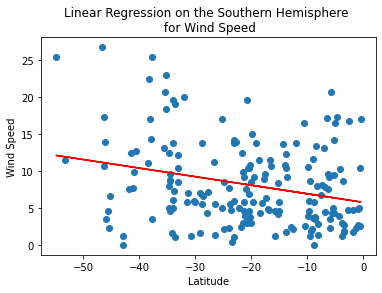

In [52]:
# Linear regression on the Southern Hemisphere Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))